---
<center>

  # **Tarea 06**

**Realizado Por:**

   Samuel Huertas Rojas

---
</center>

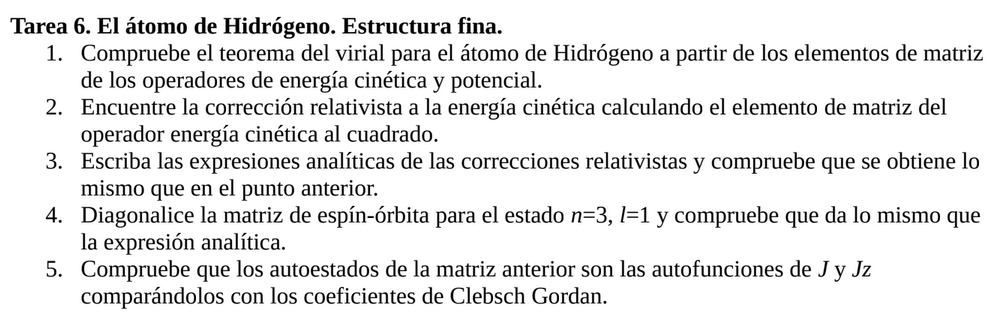